##### Задание 1. 
В зале суда есть 5 присяжных, каждый из них по отдельности с вероятностью 70% может правильно определить, виновен подсудимый или нет. С какой вероятностью они все вместе вынесут правильный вердикт, если решение принимается большинством голосов?

* 70.00%
* 83.20%
* 83.70%
* 87.50%

Теперь перейдем непосредственно к машинному обучению.

Формула

`N` - количество присяжных

`p` - вероятность правильного решения присяжного

`u` - вероятность правильного решения всего жюри

`m` - минимальное большинство членов жюри, `m = floor(N / 2) + 1`

`C(i,N)` - количество сочетаний из `N` по `i`

`u = sum([C(i,N) * p**i * (1 - p)**(N - i) for i in range(m, N)])`

In [1]:
%load_ext nb_black
import math

<IPython.core.display.Javascript object>

In [2]:
def C(i, N):
    return math.factorial(N) / math.factorial(N - i) / math.factorial(i)

<IPython.core.display.Javascript object>

In [3]:
N = 5
p = 0.7
m = math.floor(N / 2) + 1

<IPython.core.display.Javascript object>

In [4]:
u = sum([C(i, N) * p ** i * (1 - p) ** (N - i) for i in range(m, N + 1)])

<IPython.core.display.Javascript object>

In [5]:
u * 100

83.692

<IPython.core.display.Javascript object>

##### Задание 2 (Опциональное задание).
Сделайте интервальную оценку среднего возраста (age) для клиентов, которые просрочили выплату кредита, с 90% "уверенностью".(Использовать приложенный файл с данными)  
(То есть нужно расчитать в каком интервале с вероятностью 90% будет лежать среднее значение возраста случайной выборки для пользователей которые просрочили кредит и нет) 

Данные в файле `credit_scoring_sample.csv`

Данные представлены следующим образом:

**Прогнозируемая переменная**

SeriousDlqin2yrs – Человек не выплатил данный кредит в течение 90 дней; возможные значения 1/0

**Независимые признаки**

age – Возраст заёмщика кредитных средств; тип - integer  
NumberOfTime30-59DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней,  но не больше в течение последних двух лет; тип - integer  
DebtRatio – Ежемесячный отчисления на задолжености(кредиты,алименты и т.д.) / совокупный месячный доход percentage; тип - real  
MonthlyIncome – Месячный доход в долларах; тип - real  
NumberOfTimes90DaysLate – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип - integer  
NumberOfTime60-89DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней,   но не больше в течение последних двух лет; тип - integer  
NumberOfDependents – Число человек в семье кредитозаёмщика; тип - integer  

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("credit_scoring_sample.csv", sep=";")
df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


<IPython.core.display.Javascript object>

In [8]:
df.shape

(45063, 8)

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        45063 non-null int64
age                                     45063 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    45063 non-null int64
DebtRatio                               45063 non-null float64
NumberOfTimes90DaysLate                 45063 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    45063 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      43946 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


<IPython.core.display.Javascript object>

In [10]:
df.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,3.642000e+04,43946.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.452263e+03,0.789628
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.263817e+04,1.130813
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,8.000000e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


<IPython.core.display.Javascript object>

In [11]:
df_clean = df.dropna()
df_clean.shape

(36420, 8)

<IPython.core.display.Javascript object>

Для расчета, необходимо:

1) Найти 5000 случайных выборок возраста пользователей которые выплатили кредит и не выплатили(2 цифры)

2) Найти средние данных выборок(5000 средних для пользователей, которые выплатили и 5000 для пользователей, которые не выплатили)

3) Посчитать интервал в котором лежат 90% средних(должно получиться 2 интервала)

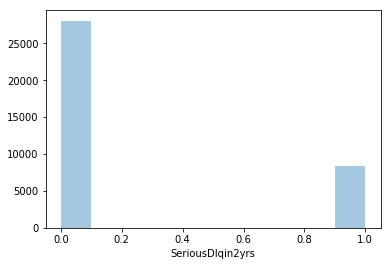

<IPython.core.display.Javascript object>

In [12]:
sns.distplot(df_clean["SeriousDlqin2yrs"], bins=10, kde=False)
plt.show()

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), n_samples)
    samples = data[indices]
    return samples

<IPython.core.display.Javascript object>

In [14]:
debtors = df_clean[df_clean["SeriousDlqin2yrs"] == 1].age
paid = df_clean[df_clean["SeriousDlqin2yrs"] == 0].age

<IPython.core.display.Javascript object>

In [15]:
def get_samples(data, n, n_samples):
    samples = []
    for i in range(n):
        sample = [item for item in get_bootstrap_samples(data, n_samples)]
        samples.append(sample)
    return samples

<IPython.core.display.Javascript object>

In [16]:
len(debtors)

8357

<IPython.core.display.Javascript object>

In [17]:
debtors_samples = get_samples(debtors.values, 5000, int(debtors.shape[0] // 1.5))

<IPython.core.display.Javascript object>

In [18]:
paid_samples = get_samples(paid.values, 5000, int(paid.shape[0] // 1.5))

<IPython.core.display.Javascript object>

In [19]:
debtors_mean = [np.mean(i) for i in debtors_samples]

<IPython.core.display.Javascript object>

In [20]:
paid_mean = [np.mean(i) for i in paid_samples]

<IPython.core.display.Javascript object>

In [21]:
np.percentile(debtors_mean, [0, 90])

array([45.091725  , 46.08976844])

<IPython.core.display.Javascript object>

In [22]:
np.percentile(paid_mean, [0, 90])

array([51.24449433, 51.74957772])

<IPython.core.display.Javascript object>

##### Задание 3.

Подберите оптимальные параметры доли сэмпла и количества деревьев для минимизации MSE.

Ниже приведен код, написанный на занятии. Вам необходимо подобрать с помощью циклов и/или массивов оптимальные параметры для указанных переменных. В классном занятии доля сэмпла была 2/3 (мы делили на 1.5). А количество деревьев - 10

Text(0.5, 1.0, 'Bagging of decision trees, MSE = 14.75')

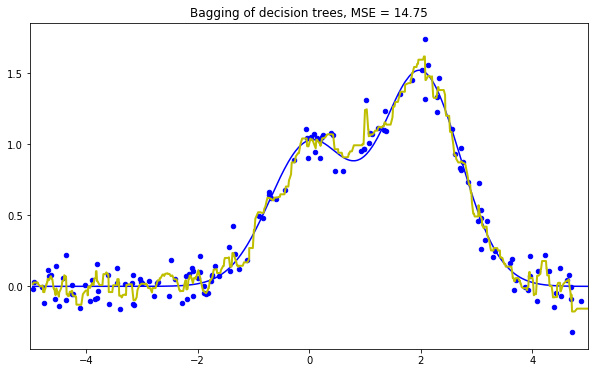

<IPython.core.display.Javascript object>

In [24]:
import numpy as np

import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    BaggingRegressor,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# Generate data
np.random.seed(42)

n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), n_samples)
    samples = data[indices]
    return samples


dtrees_bagging = []


def bagging_fit(X, y, n_trees=10, samples_share=1.5):
    dtrees_bagging.clear()
    full_X_y = np.array(list(zip(np.array(X)[:, 0], y)))
    for t in range(n_trees):
        samp_X_y = get_bootstrap_samples(full_X_y, int(len(full_X_y) / samples_share))
        X_new = samp_X_y[:, 0].reshape((len(samp_X_y), 1))
        y_new = samp_X_y[:, 1]
        dtrees_bagging.append(DecisionTreeRegressor().fit(X_new, y_new))


def bagging_predict(X):
    d_predicts = []
    for dtree in dtrees_bagging:
        d_predicts.append(dtree.predict(X))
    d_predicts = np.array(d_predicts)
    return np.mean(d_predicts, axis=0)


bagging_fit(X_train, y_train)
bdt_predict = bagging_predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging of decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2))

In [25]:
from operator import itemgetter

<IPython.core.display.Javascript object>

In [26]:
np.random.seed(42)

mse_sample = []
for n_trees in range(1, 30):
    for share in np.arange(1, 5, 0.1):
        bagging_fit(X_train, y_train, n_trees, share)
        bdt_predict = bagging_predict(X_test)
        mse_sample.append([n_trees, share, np.sum((y_test - bdt_predict) ** 2)])

print("MSE =", min(mse_sample, key=itemgetter(2)))

MSE = [12, 4.700000000000003, 11.51404922050447]


<IPython.core.display.Javascript object>

##### Задание 4.

На занятии мы не успели попрактиковаться в построении алгоритма машинного обучения на основе RandomForest. Предлагается вам самостоятельно обучить `RandomForestRegressor` на той же самой сгенерированной выборке, что и в коде выше.

Вам необходимо самостоятельно разобраться, какие параметры принимает на вход функция. Документация: https://scikit-learn.org/0.20/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Подберите оптимальное число деревьев (n_estimators) и глубину деревьев (max_depth) в RandomForest, аналогично тому, как вы сделали это в задании 3.

Какой алгоритм в оптимуме отработал лучше? Bagging или RandomForest?

In [27]:
from sklearn.ensemble import RandomForestRegressor

<IPython.core.display.Javascript object>

In [31]:
np.random.seed(42)
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3)
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)

<IPython.core.display.Javascript object>

In [29]:
np.sum((y_test - rfr_predict) ** 2)

13.788109509076692

<IPython.core.display.Javascript object>

In [38]:
np.random.seed(42)

mse_sample = []
for max_depth in range(1, 20):
    for min_samples_leaf in np.arange(1, 5):
        for n_estimators in range(10, 150, 5):
            rfr = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
            )
            rfr.fit(X_train, y_train)
            rfr_predict = rfr.predict(X_test)
            mse_sample.append(
                [
                    n_estimators,
                    max_depth,
                    min_samples_leaf,
                    np.sum((y_test - rfr_predict) ** 2),
                ]
            )

print("MSE =", min(mse_sample, key=itemgetter(3)))

MSE = [30, 16, 3, 12.265008543555773]


<IPython.core.display.Javascript object>

Количество деревьев = 30

Максимальная глубина = 16

Размер минимальной выборки в листе = 3

##### Bagging отработал лучше если сравнивать ошибку MSE 

##### Задание 5.

1. Замените функцию `np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)` в задании 3 на более сложную:  
`1/10 * (ln(x)/2)**sin(x)` в диапазоне `27 > x > 16` (https://snob.ru/selected/entry/8779)
2. Увеличьте шум.

Проделайте те же самые шаги - обучите обычное дерево решений, бэггинг деревьев решение и RandomForest. Сравните метрики. Насколько они отличаются от того, что получилось в задании 3 и 4?

In [45]:
np.random.seed(42)


def f(x):
    x = x.ravel()
    return 1 / 10 * (np.log(x) / 2) ** np.sin(x)


noise = 0.2


def generate(n_samples, noise):
    X = np.random.randint(16, 27, n_samples)
    X = np.sort(X).ravel()
    y = 1 / 10 * (np.log(X) / 2) ** np.sin(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y


X_train_new, y_train_new = generate(n_samples=n_train, noise=noise)
X_test_new, y_test_new = generate(n_samples=n_test, noise=noise)

<IPython.core.display.Javascript object>

In [56]:
tree = DecisionTreeRegressor()
tree.fit(X_train_new, y_train_new)
tree_pred = tree.predict(X_test_new)

<IPython.core.display.Javascript object>

In [57]:
print("Tree MSE =", np.sum((y_test - tree_pred) ** 2))

Tree MSE = 364.4017269664389


<IPython.core.display.Javascript object>

In [59]:
np.random.seed(42)

mse_sample = []
for n_trees in range(1, 30):
    for share in np.arange(1, 5, 0.1):
        bagging_fit(X_train_new, y_train_new, n_trees, share)
        bdt_predict = bagging_predict(X_test_new)
        mse_sample.append([n_trees, share, np.sum((y_test_new - bdt_predict) ** 2)])

print("Bagging MSE =", min(mse_sample, key=itemgetter(2)))

Bagging MSE = [13, 4.200000000000003, 42.56923764961873]


<IPython.core.display.Javascript object>

In [60]:
np.random.seed(42)

mse_sample = []
for max_depth in range(1, 20):
    for min_samples_leaf in np.arange(1, 5):
        for n_estimators in range(10, 150, 5):
            rfr = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
            )
            rfr.fit(X_train_new, y_train_new)
            rfr_predict = rfr.predict(X_test_new)
            mse_sample.append(
                [
                    n_estimators,
                    max_depth,
                    min_samples_leaf,
                    np.sum((y_test_new - rfr_predict) ** 2),
                ]
            )

print("Forest MSE =", min(mse_sample, key=itemgetter(3)))

Forest MSE = [15, 1, 4, 42.73296812544714]


<IPython.core.display.Javascript object>

### Значения ошибки в предсказании более сложной функции и с большим шумом оказались выше в несколько раз вне зависимости от метода